<a href="https://colab.research.google.com/github/Atchu167/Project-1/blob/main/Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("Retail_Business_Performance_Dataset.csv")

In [3]:
# Basic overview
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print(df.describe())

Shape: (5000, 11)
Columns: Index(['Order_Date', 'Region', 'Category', 'Sub_Category', 'Product_Name',
       'Price', 'Cost', 'Quantity', 'Revenue', 'Profit', 'Inventory_Days'],
      dtype='object')
Missing values:
 Order_Date        0
Region            0
Category          0
Sub_Category      0
Product_Name      0
Price             0
Cost              0
Quantity          0
Revenue           0
Profit            0
Inventory_Days    0
dtype: int64
             Price         Cost     Quantity      Revenue       Profit  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    256.448262   198.986566    10.039600  2580.702590   575.245426   
std     142.179982   114.546346     5.476279  2151.082794   585.498329   
min      10.350000     7.250000     1.000000    16.160000     1.460000   
25%     131.717500    99.232500     5.000000   799.847500   144.877500   
50%     260.640000   197.195000    10.000000  1995.635000   375.020000   
75%     376.912500   290.347500 

In [4]:
# Profitability by Category
category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print("\nTotal Profit by Category:\n", category_profit)


Total Profit by Category:
 Category
Furniture          609792.29
Electronics        579163.83
Clothing           569336.68
Grocery            561573.70
Office Supplies    556360.63
Name: Profit, dtype: float64


In [5]:
# Correlation analysis
correlation = df[['Inventory_Days', 'Profit', 'Revenue', 'Quantity']].corr()
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
                 Inventory_Days    Profit   Revenue  Quantity
Inventory_Days        1.000000  0.000491  0.005380 -0.002756
Profit                0.000491  1.000000  0.810599  0.532007
Revenue               0.005380  0.810599  1.000000  0.657046
Quantity             -0.002756  0.532007  0.657046  1.000000


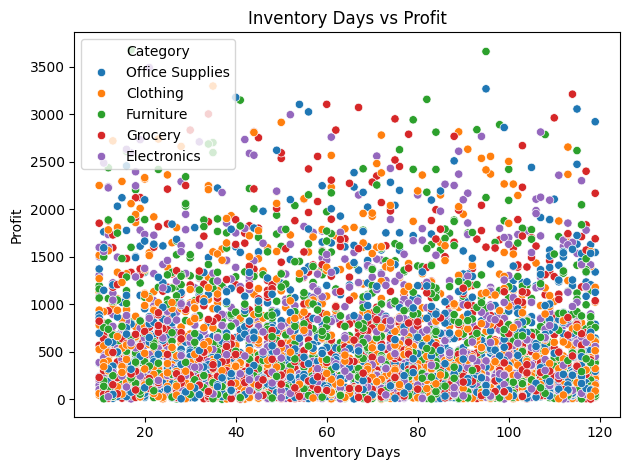

In [6]:
# Plot: Inventory Days vs Profit
sns.scatterplot(data=df, x='Inventory_Days', y='Profit', hue='Category')
plt.title("Inventory Days vs Profit")
plt.xlabel("Inventory Days")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

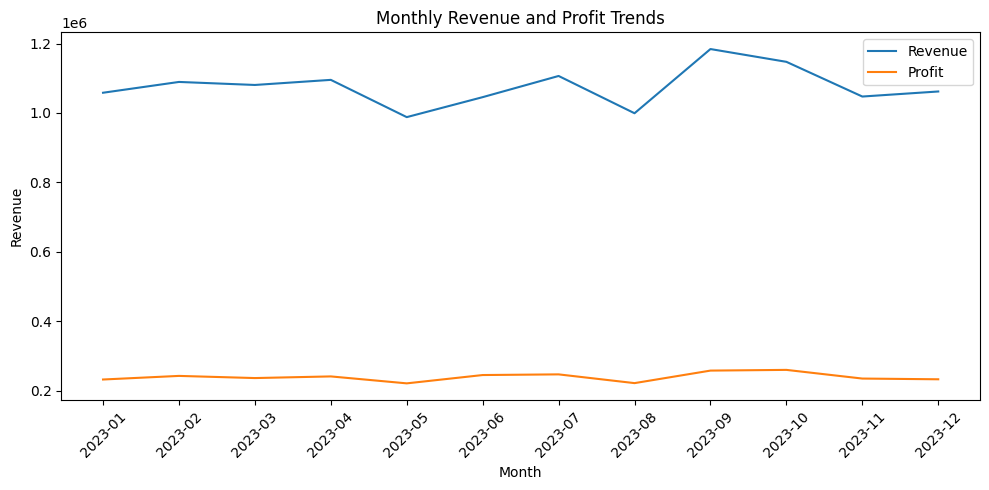

In [8]:
# Monthly trend
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)
monthly = df.groupby('Month')[['Revenue', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x='Month', y='Revenue', label='Revenue')
sns.lineplot(data=monthly, x='Month', y='Profit', label='Profit')
plt.xticks(rotation=45)
plt.title("Monthly Revenue and Profit Trends")
plt.tight_layout()
plt.show()